<div style="text-align:left;">
  <a href="https://code213.tech/" target="_blank">
    <img src="../images/code213.PNG" alt="QWorld">
  </a>
  <p><em>prepared by Latreche Sara</em></p>
</div>
**<center><font size=8>Predicting California Housing Price </font></center>**
 
<div style="text-align: center;">
    <img src="attachment:230de404-00b0-4bc6-85bb-14183246112a.jpg" width="400"/>
</div>



***
**author**: Latreche Sara

**date**: /2025

**Table of Contents**
- <a href='#intro'>1 | Project Overview and Objectives</a>

- <a href='#env'>1.1 | Setting Up the Environment</a>

- <a href='#explore'>1.2 | Exploring the Dataset</a>

- <a href='#prep'>1.3 | Preprocessing the Dataset</a>

- <a href='#textcat'>Handling Text and Categorical Attributes</a>

- <a href='#train'>1.4 | Select and Train the Model</a>

- <a href='#eval'>1.5 | Evaluating the Model</a>

- <a href='#tune'>1.6 | Fine-Tune Your Model</a>

- <a href='#concl'>1.7 | Conclusion</a>

## <b>1 <span style='color:#e61227'>|</span> <a id='env'>1.Project Overview and Objectives</a></b> 




**In this case study, we’ll build a Machine Learning model to predict median house values in California districts using the California Housing Dataset. 
We’ll walk through the full ML workflow, from problem framing to model evaluation.
Imagine you’ve just joined a data science team at a real estate analytics company. Your boss gives you the following task:**

**"We’re trying to help housing developers and real estate agents better understand the California housing market. We need a model that can predict the median house price in any district, based on available data like income levels, house age, population, and location. Use the data we have and build us something reliable!"**

**This isn't just a technical exercise—it’s a real-world problem with significant social and economic impact:**

 - Affordable Housing: Knowing where housing is too expensive can help guide affordable housing policies.

 - Urban Planning: Predicting price trends helps city planners with zoning and infrastructure development.

 - Investment Insights: Real estate investors need accurate price predictions to make profitable decisions.

 Your Mission

 - Use Machine Learning to build a predictive model that:

 - Understands the patterns in housing data across California.

 -Accurately estimates the median housing price in a district.

**Can generalize well to unseen districts.
This notebook walks through the end-to-end ML workflow to solve this challenge.**

<a id="env"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>1.1 |</span> Setting Up the Environment</b></p>
</div>



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


<a id="explore"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>1.2 |</span> Exploring the Dataset</b></p>
</div>


In [6]:
df= pd.read_csv('housing.csv')

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# count the unique values in the column "ocean_proximity"
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [9]:
# perform describtive statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


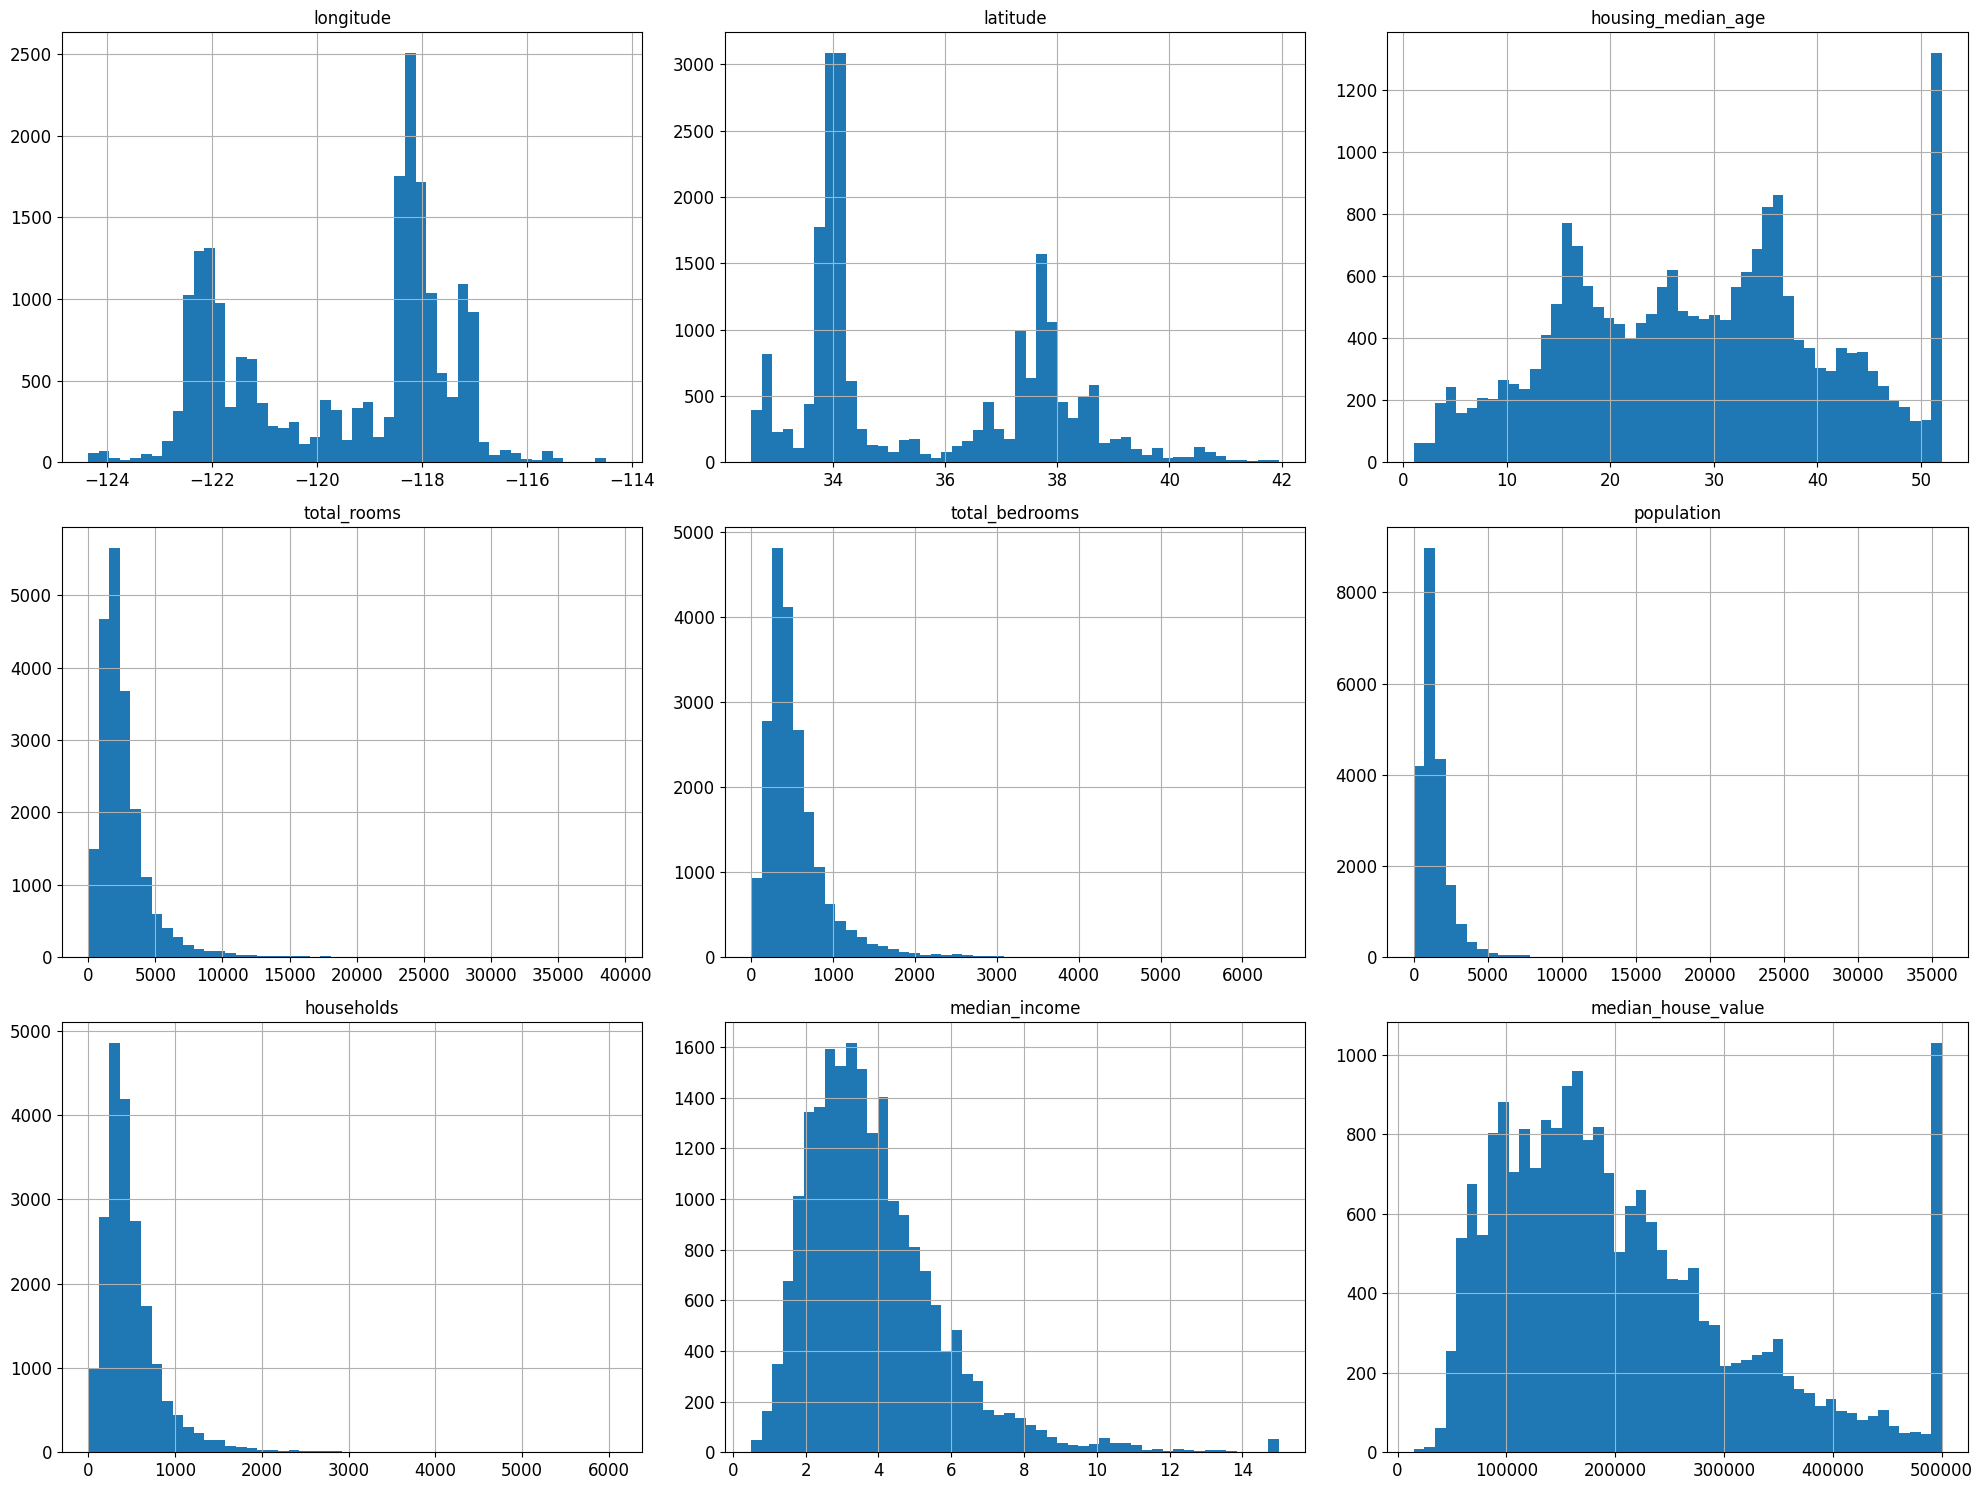

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure attribute histogram plots


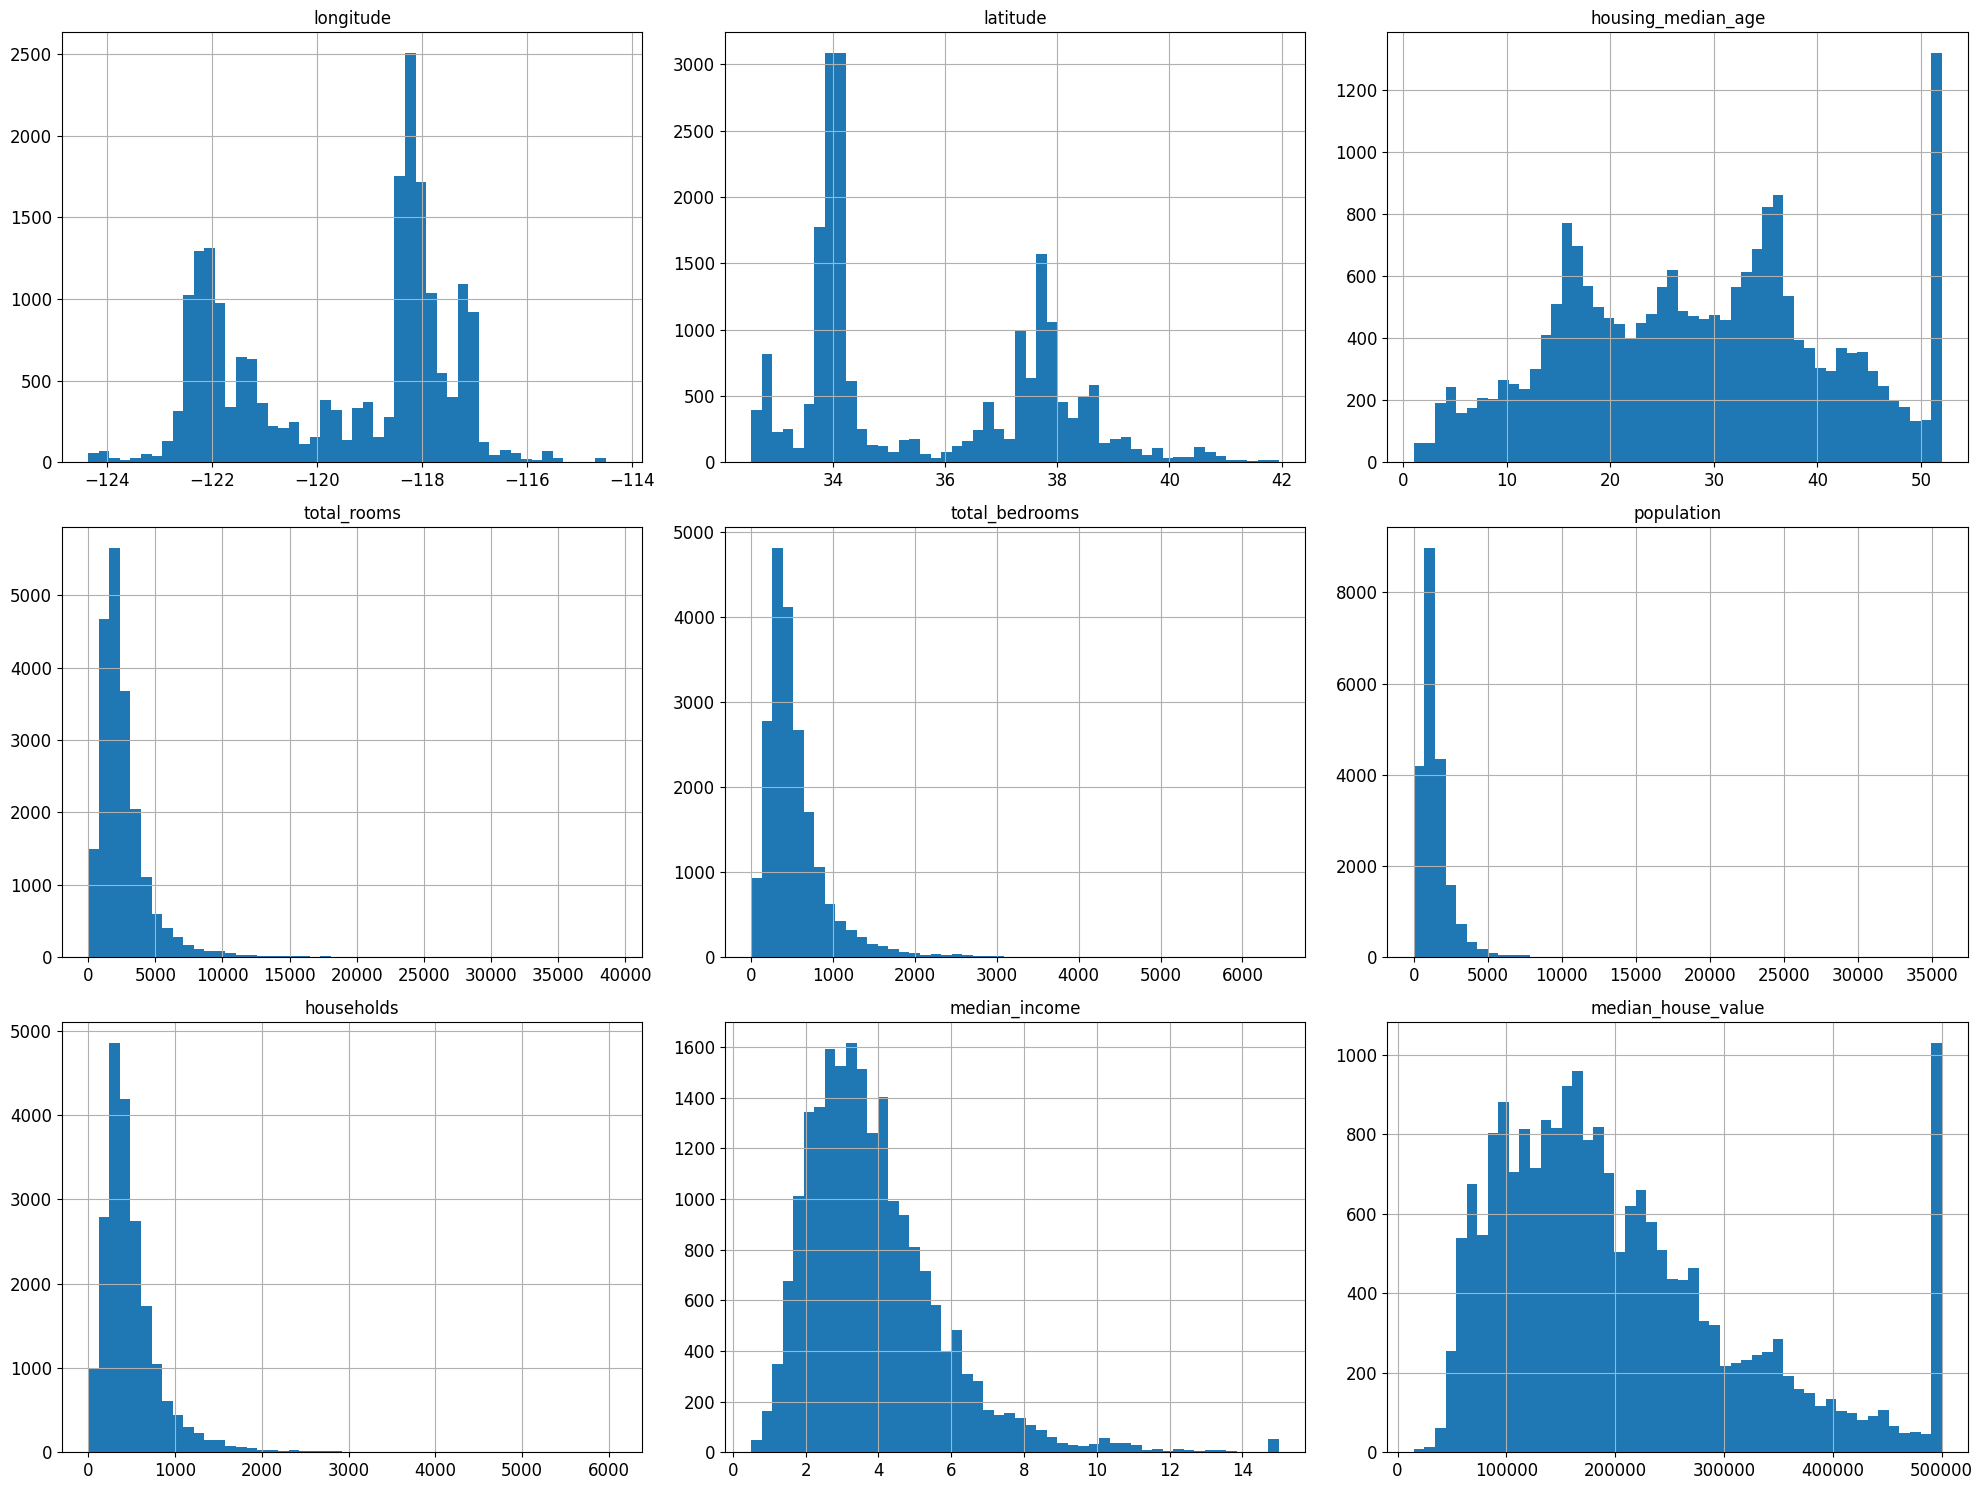

In [11]:
df.hist(bins=50,figsize=(20,15))
save_fig("attribute histogram plots")
plt.show()


<a id="prep"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>1.3 |</span> Preprocessing the Dataset</b></p>
</div>


In [12]:
# to make this notebook's output identical at every run
np.random.seed(42)

### The goal of this exercise is to implement a custom version of the train_test_split function, similar to the one provided by scikit-learn. This function will split your dataset into a training set and a testing set.



In [ ]:
# Instructions: Complete the function below to split a dataset into training and testing sets.
# You will need to shuffle the data, calculate the size of the test set, and use indices to separate the data.

import numpy as np

def split_train_test(data, test_ratio):
    # Step 1: Generate a random permutation of all indices in the dataset
    # Hint: Use np.random.permutation() on the length of the data
    shuffled_indices = ___________________________

    # Step 2: Calculate the number of test samples
    # Hint: Multiply the total number of rows by the test_ratio and convert to int
    test_set_size = ___________________________

    # Step 3: Select the first part of the shuffled indices as test indices
    test_indices = ___________________________

    # Step 4: Use the remaining indices for the training set
    train_indices = ___________________________

    # Step 5: Return the training and test subsets using .iloc
    return ___________________________, ___________________________


In [8]:
# Instructions: Complete the function below to split a dataset into training and testing sets.
# You will need to shuffle the data, calculate the size of the test set, and use indices to separate the data.

import numpy as np

def split_train_test(data, test_ratio):
    # Step 1: Generate a random permutation of all indices in the dataset
    # Hint: Use np.random.permutation() on the length of the data
    shuffled_indices = np.random.permutation(len(data))

    # Step 2: Calculate the number of test samples
    # Hint: Multiply the total number of rows by the test_ratio and convert to int
    test_set_size = int(len(data)*test_ratio)

    # Step 3: Select the first part of the shuffled indices as test indices
    test_indices = shuffled_indices[:test_set_size]

    # Step 4: Use the remaining indices for the training set
    train_indices = shuffled_indices[test_set_size:]

    # Step 5: Return the training and test subsets using .iloc
    return data.iloc[test_indices], data.iloc[train_indices]


In [4]:
# create a fata frame named data

data=pd.read_csv('housing.csv')

In [9]:
# call your function to test it with test_ratio=0.2

split_train_test(data, 0.2)

# keep the result in two variables train_set, test_set
train_set, test_set  =split_train_test(data,0.2)
# what is the length of train_set and test_set
len(train_set),len(test_set)

(4128, 16512)

In [10]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]



In [12]:
housing_with_id = data.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [13]:
housing_with_id["id"] = data["longitude"] * 1000 + data["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [14]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


Now try to use the sklearn function from sklearn packege to do the same work


In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [16]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

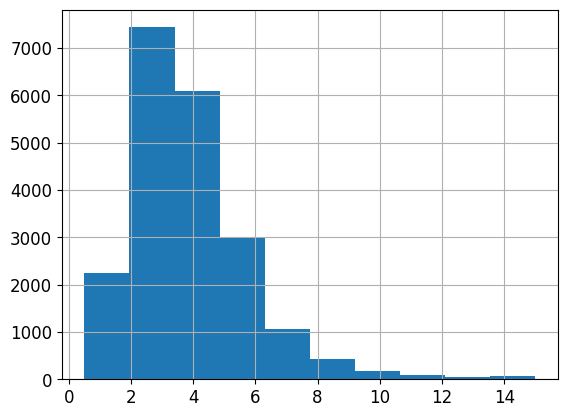

In [17]:
# create a histogram of the median_income column

data['median_income'].hist()

In [ ]:
# Instructions: Create a new column 'income_cat' by categorizing the 'median_income' values
# into income categories using pd.cut(). This is helpful for stratified sampling or analysis.

# Step 1: Use pd.cut() to divide 'median_income' into defined bins
# Hint: You'll need to provide the 'bins' argument with the cut-off values

# Step 2: Assign category labels (e.g., 1, 2, 3, ...) to each bin using the 'labels' argument

# Step 3: Assign the resulting categories to a new column called 'income_cat'

data["income_cat"] = pd.cut(data["______________"],
                               bins=[_______, _______, _______, _______, _______, ________],
                               labels=[____, ____, ____, ____, ____])


In [19]:
# Instructions: Create a new column 'income_cat' by categorizing the 'median_income' values
# into income categories using pd.cut(). This is helpful for stratified sampling or analysis.

# Step 1: Use pd.cut() to divide 'median_income' into defined bins
# Hint: You'll need to provide the 'bins' argument with the cut-off values [0., 1.5, 3.0, 4.5, 6., np.inf],

# Step 2: Assign category labels (e.g., 1, 2, 3, ...) to each bin using the 'labels' argument

# Step 3: Assign the resulting categories to a new column called 'income_cat'

data["income_cat"] = pd.cut(data["median_income"],
                               bins=[0.,1.5 ,3.0 ,4.5,6. ,np.inf ],
                               labels=[1,2,3, 4,5])


In [ ]:
# Instructions: Count the number of instances in each income category.
# This will help you understand the distribution of data across the defined categories.

# Step 1: Access the 'income_cat' column from the housing DataFrame

# Step 2: Use the value_counts() method to count how many entries fall into each category

# Complete the line below:



In [20]:
# Instructions: Count the number of instances in each income category.
# This will help you understand the distribution of data across the defined categories.

# Step 1: Access the 'income_cat' column from the housing DataFrame

# Step 2: Use the value_counts() method to count how many entries fall into each category

# Complete the line below:

data["income_cat"].value_counts()

,count
income_cat,
3,7236
2,6581
4,3639
5,2362
1,822


In [ ]:
# draw the histogram of income_cat


<Axes: >

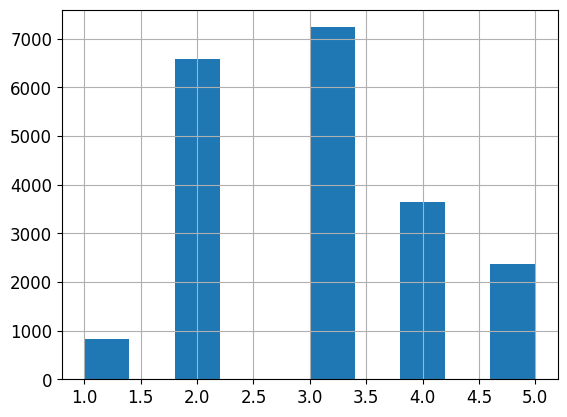

In [21]:
# draw the histogram of income_cat
data['income_cat'].hist()

In [ ]:
# Instructions: Use StratifiedShuffleSplit from scikit-learn to split the dataset into
# training and testing sets while preserving the proportion of each income category.

# Step 1: Import StratifiedShuffleSplit from sklearn.model_selection
from sklearn.model_selection import ____________________________

# Step 2: Create a StratifiedShuffleSplit object
# Hint: Use 1 split, 20% test size, and set random_state=42 for reproducibility
split = StratifiedShuffleSplit(n_splits=__, test_size=____, random_state=____)

# Step 3: Iterate through the split (only one iteration needed)
# Hint: Use the .split() method on the full dataset and the 'income_cat' column
for train_index, test_index in split.split(__________, ____________):

    # Step 4: Use .loc to select rows for training and testing sets using the provided indices
    strat_train_set = __________.loc[_____________]
    strat_test_set = __________.loc[_____________]


In [22]:
# Instructions: Use StratifiedShuffleSplit from scikit-learn to split the dataset into
# training and testing sets while preserving the proportion of each income category.

# Step 1: Import StratifiedShuffleSplit from sklearn.model_selection
from sklearn.model_selection import StratifiedShuffleSplit

# Step 2: Create a StratifiedShuffleSplit object
# Hint: Use 1 split, 20% test size, and set random_state=42 for reproducibility
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

# Step 3: Iterate through the split (only one iteration needed)
# Hint: Use the .split() method on the full dataset and the 'income_cat' column
for train_index, test_index in split.split(data, data['income_cat']):

# Step 4: Use .loc to select rows for training and testing sets using the provided indices
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]


In [ ]:
# Instructions:
# Analyze the proportion of each income category in the stratified test set.
# This helps verify that the split preserved the distribution of income categories.

# Step 1: Access the 'income_cat' column from the stratified test set

# Step 2: Use value_counts() to count how many samples are in each category

# Step 3: Divide the counts by the total number of entries in the test set
#         to get the proportion (as a percentage of the whole test set)

# Complete the line below:

strat_test_set["______________"].______________() / ________(______________)


In [23]:
# Instructions:
# Analyze the proportion of each income category in the stratified test set.
# This helps verify that the split preserved the distribution of income categories.

# Step 1: Access the 'income_cat' column from the stratified test set

# Step 2: Use value_counts() to count how many samples are in each category

# Step 3: Divide the counts by the total number of entries in the test set
#         to get the proportion (as a percentage of the whole test set)

# Complete the line below:

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


,count
income_cat,
3,0.350581
2,0.318798
4,0.176357
5,0.114341
1,0.039922


In [ ]:
# Instructions: Calculate the proportion of each income category in the full dataset.
# This is useful for comparing with the stratified sample distribution later.

# Step 1: Access the 'income_cat' column from the housing DataFrame

# Step 2: Use value_counts() to get the number of occurrences for each category

# Step 3: Divide the result by the total number of rows in the dataset (i.e., len(data))

# Complete the line below:

data["______________"].______________() / ________(______________)


In [25]:
# Instructions: Calculate the proportion of each income category in the full dataset.
# This is useful for comparing with the stratified sample distribution later.

# Step 1: Access the 'income_cat' column from the housing DataFrame

# Step 2: Use value_counts() to get the number of occurrences for each category

# Step 3: Divide the result by the total number of rows in the dataset (i.e., len(data))

# Complete the line below:

data["income_cat"].value_counts() /len(data)


,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [ ]:
# Instructions:
# Define a function that computes the proportion of each income category in a given dataset,
# then compare the distributions of the full dataset, stratified split, and random split.

# Step 1: Define a function that returns the proportion of each income category
def income_cat_proportions(________):
    return ________["______________"].______________() / ______(________)

# Step 2: Create a random train-test split (this one does NOT use stratification)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(________, test_size=____, random_state=____)

# Step 3: Use your function to compute proportions for the full data, stratified split, and random split
# Then combine the results into a DataFrame for comparison

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(__________),
    "Stratified": income_cat_proportions(______________),
    "Random": income_cat_proportions(_____________),
}).______________()

# Step 4: Compute percentage error between the Random/Stratified proportions and the Overall proportions

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100


In [28]:
# Instructions:
# Define a function that computes the proportion of each income category in a given dataset,
# then compare the distributions of the full dataset, stratified split, and random split.

# Step 1: Define a function that returns the proportion of each income category
def income_cat_proportions(data):
    return data["income_cat"].value_counts() /len(data)

# Step 2: Create a random train-test split (this one does NOT use stratification)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# Step 3: Use your function to compute proportions for the full data, stratified split, and random split
# Then combine the results into a DataFrame for comparison

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

# Step 4: Compute percentage error between the Random/Stratified proportions and the Overall proportions

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100


In [29]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039922,0.040213,0.973236,0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350581,0.358527,2.266446,0.000000
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


Purpose of Removal: The income_cat column was created to help ensure a representative distribution of income categories in the training and testing sets. Once the data has been split using this column, it is no longer needed for model training or evaluation and should be removed to return the datasets to their original structure.



In [31]:
# Instructions:
# After splitting the data using the 'income_cat' column for stratification,
# we no longer need this column in the training and test sets.
# Remove the 'income_cat' column from both datasets.

# Step 1: Loop through both the stratified training and test sets
for set_ in (strat_train_set, strat_test_set):

    # Step 2: Drop the 'income_cat' column from each set
    # Hint: Use drop() with axis=1 to remove a column
    # Set inplace=True to apply the change directly to the DataFrame
    set_.drop("income_cat", axis=1, inplace=True)


In [ ]:
# Instructions:
# After splitting the data using the 'income_cat' column for stratification,
# we no longer need this column in the training and test sets.
# Remove the 'income_cat' column from both datasets.

# Step 1: Loop through both the stratified training and test sets
for set_ in (__________________, ___________________):

    # Step 2: Drop the 'income_cat' column from each set
    # Hint: Use drop() with axis=1 to remove a column
    # Set inplace=True to apply the change directly to the DataFrame
    set_.drop("_____________", axis=__, inplace=________)


In [32]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

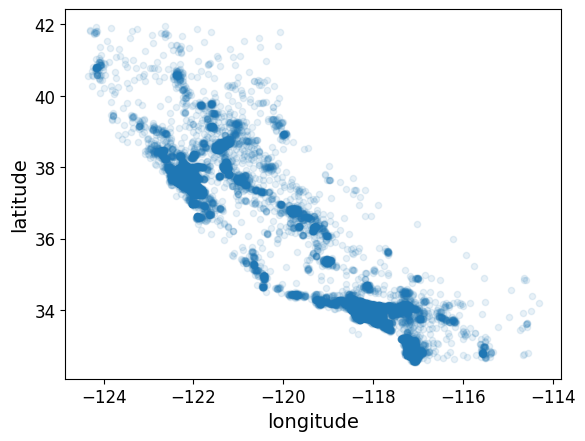

In [34]:
# bad visulaisation/ crete a scatter plot using plot() function to represent latitude vs
# longitude of the data frame housng
# good visualisation add the alpha=0.1


This code creates a scatter plot that visualizes housing data on a geographical map. The size of each point represents the population, and the color represents the median house value. This visualization can be helpful to identify patterns and relationships between location, population density, and house prices.

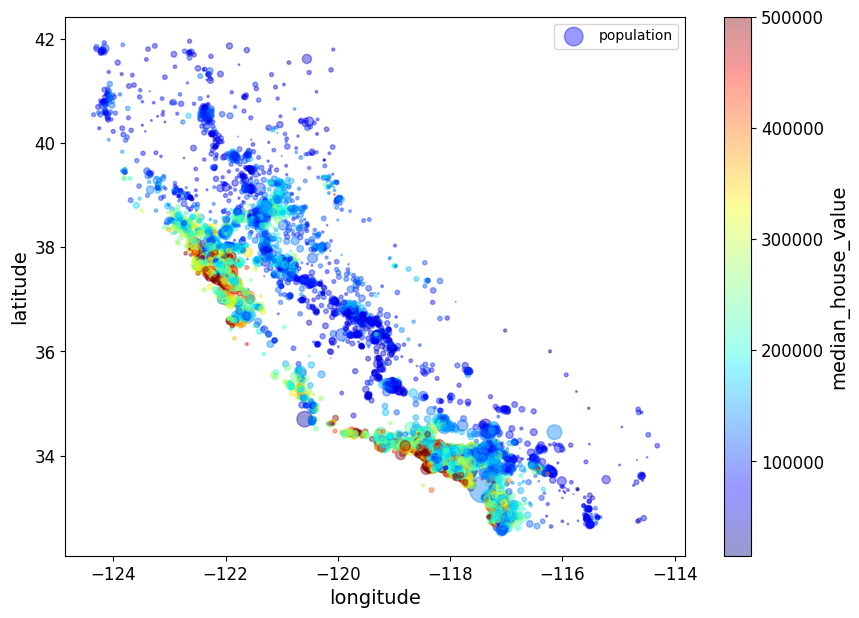

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

Looking for Correlations

In [40]:
#corr_matrix = housing.corr()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15480 entries, 2370 to 10061
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15480 non-null  float64
 1   latitude            15480 non-null  float64
 2   housing_median_age  15480 non-null  float64
 3   total_rooms         15480 non-null  float64
 4   total_bedrooms      15331 non-null  float64
 5   population          15480 non-null  float64
 6   households          15480 non-null  float64
 7   median_income       15480 non-null  float64
 8   median_house_value  15480 non-null  float64
 9   ocean_proximity     15480 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [42]:
# Select only the numerical features for correlation calculation.
numerical_features = housing.select_dtypes(include=np.number)
corr_matrix = numerical_features.corr()

In [ ]:
# Instructions:
# Compute the correlation matrix, but only for numerical features in the dataset.
# This is important because correlation is only defined for numerical values.

# Step 1: Use select_dtypes() to select only numerical columns from the DataFrame
# Hint: Use include=np.number to filter numeric types

numerical_features = housing.______________________(include=______________)

# Step 2: Compute the correlation matrix for these numerical features
corr_matrix = __________________________.________()


In [43]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924580,-0.112000,0.051092,0.078457,0.108745,0.064105,-0.019355,-0.050832
latitude,-0.924580,1.000000,0.011280,-0.041563,-0.074295,-0.116079,-0.079043,-0.075455,-0.139756
housing_median_age,-0.112000,0.011280,1.000000,-0.365047,-0.324281,-0.297466,-0.305010,-0.111328,0.114116
total_rooms,0.051092,-0.041563,-0.365047,1.000000,0.928598,0.852779,0.917480,0.198570,0.135466
total_bedrooms,0.078457,-0.074295,-0.324281,0.928598,1.000000,0.873387,0.979752,-0.012094,0.047654
population,0.108745,-0.116079,-0.297466,0.852779,0.873387,1.000000,0.902271,-0.000160,-0.027496
households,0.064105,-0.079043,-0.305010,0.917480,0.979752,0.902271,1.000000,0.008253,0.064853
median_income,-0.019355,-0.075455,-0.111328,0.198570,-0.012094,-0.000160,0.008253,1.000000,0.686591
median_house_value,-0.050832,-0.139756,0.114116,0.135466,0.047654,-0.027496,0.064853,0.686591,1.000000


In [44]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.686591
total_rooms,0.135466
housing_median_age,0.114116
households,0.064853
total_bedrooms,0.047654
population,-0.027496
longitude,-0.050832
latitude,-0.139756


In [ ]:
# Instructions:
# You are exploring the correlation between different attributes and the target variable 'median_house_value'.
# Use the correlation matrix to find which features are most strongly correlated with house value.

# Step 1: Access the correlation matrix you've previously computed (usually with .corr())

# Step 2: Select the row corresponding to 'median_house_value' to see how it correlates with other features

# Step 3: Sort the values in descending order to find the most positively correlated attributes

# Complete the line below:

corr_matrix["________________________"].________________________(ascending=________)


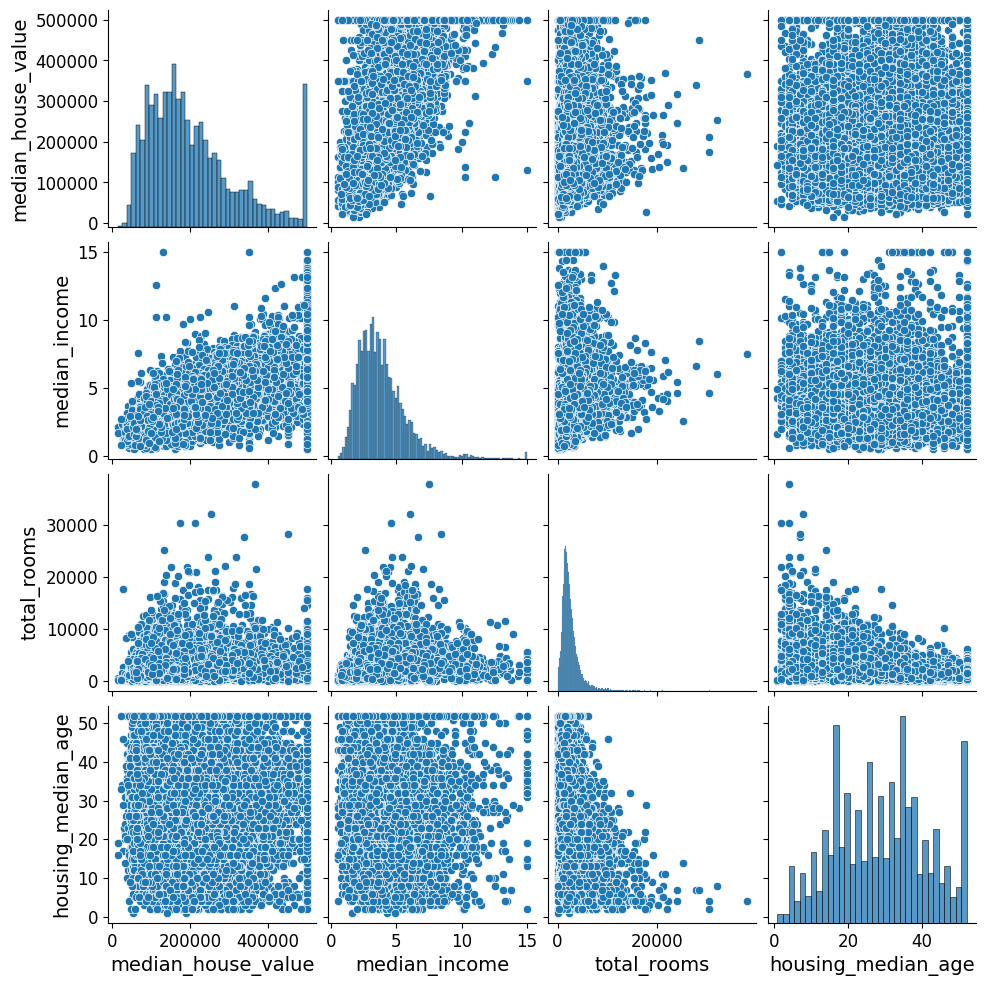

In [49]:
import seaborn as sns

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(housing[attributes],palette='magma')
plt.show() # To display the plot

In [ ]:
# Instructions:
# Use seaborn's pairplot to visualize the pairwise relationships between key attributes.
# This helps you identify potential correlations or patterns in the dataset.

# Step 1: Import seaborn if you haven't already
import __________ as _____

# Step 2: Select the attributes you want to compare
attributes = ["_____________________", "_________________", "______________", "______________________"]

# Step 3: Use sns.pairplot to plot pairwise scatter plots for these attributes
# Hint: You can specify a color palette like 'magma' for better visuals

sns.____________(housing[___________], palette='________')

# Step 4: Use plt.show() to display the plots
import matplotlib.pyplot as plt
plt.________()


(np.float64(0.0), np.float64(16.0), np.float64(0.0), np.float64(550000.0))

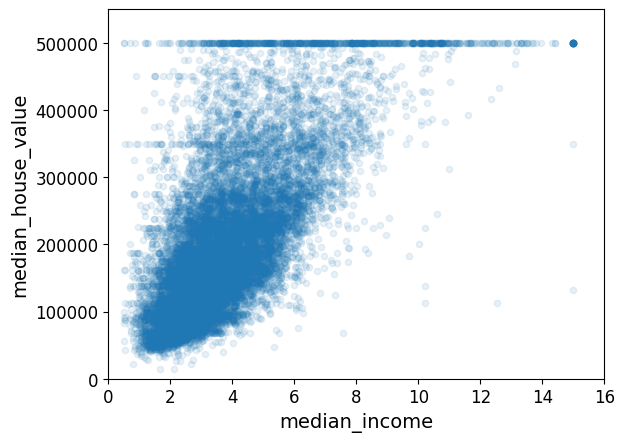

In [50]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [ ]:
# Instructions:
# Create a scatter plot to visualize the relationship between median income and house value.
# Use a low alpha to reveal data density, and set custom axis limits for better clarity.

# Step 1: Use the plot() method on the housing DataFrame to create a scatter plot
# Hint: Use kind="scatter", x="median_income", y="median_house_value", and alpha=0.1 for transparency

housing.plot(kind="________", x="_________________", y="__________________________",
             alpha=____)

# Step 2: Set the axis limits to zoom in on the main cluster of data
# Format: plt.axis([xmin, xmax, ymin, ymax])
import matplotlib.pyplot as plt
plt.______([____, ____, ____, ______])




<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.3|</span></b> Prepare the Data for Machine Learning Algorithms </b></p>
</div>

In [51]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
# Instructions:
# Prepare your training features and labels for a supervised learning task.
# You'll separate the target variable ('median_house_value') from the rest of the dataset.
# those perations are performed on strat_train_set
# Step 1: Drop the target column from the training set to keep only the features
# Hint: Use drop() with axis=1 to drop a column y = wx+ wx+ wx +b 

housing = ____________________.drop("________________________", axis=__) 

# Step 2: Make a copy of the target column to use as the label vector for training
# Hint: Use .copy() to avoid unintentional modification of the original DataFrame
#strat_train_set

housing_labels = ____________________["________________________"]._______()  


## Data Cleaning

We have seen that the column total_bedrooms contains some missing values to clean this we have three options:
housing.dropna(subset=["total_bedrooms"])    
# option 1 drop the missing values
housing.drop("total_bedrooms", axis=1)      
 # option 2 drop the column
median = housing["total_bedrooms"].median()  
# option 3 fill wilh median
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [52]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,NEAR BAY
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN
13706,-117.22,34.11,26.0,2972.0,NaN,1972.0,532.0,2.0388,INLAND
8383,-118.36,33.96,26.0,3543.0,NaN,2742.0,951.0,2.5504,<1H OCEAN
4743,-118.36,34.05,42.0,1372.0,NaN,674.0,271.0,2.8793,<1H OCEAN


In [53]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [54]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,NEAR BAY
9814,-121.93,36.62,34.0,2351.0,1063.0,428.0,3.7250,NEAR OCEAN
13706,-117.22,34.11,26.0,2972.0,1972.0,532.0,2.0388,INLAND
8383,-118.36,33.96,26.0,3543.0,2742.0,951.0,2.5504,<1H OCEAN
4743,-118.36,34.05,42.0,1372.0,674.0,271.0,2.8793,<1H OCEAN


In [55]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [56]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
696,-122.10,37.69,41.0,746.0,431.0,387.0,161.0,3.9063,NEAR BAY
9814,-121.93,36.62,34.0,2351.0,431.0,1063.0,428.0,3.7250,NEAR OCEAN
13706,-117.22,34.11,26.0,2972.0,431.0,1972.0,532.0,2.0388,INLAND
8383,-118.36,33.96,26.0,3543.0,431.0,2742.0,951.0,2.5504,<1H OCEAN
4743,-118.36,34.05,42.0,1372.0,431.0,674.0,271.0,2.8793,<1H OCEAN


Scikit-Learn provides a handy class to take care of missing values:
 SimpleImputer
 . Here is how to use it. First, you need to create a
 SimpleImputer
 instance, specifying that you want to replace each attribute’s
 missing values with the median of that attribute

In [60]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, you need to
 create a copy of the data without the text attribute
ocean_proximity


In [61]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

 Now you can fit the
imputer
 instance to the training data using the
fit()
 method

In [62]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

imputer.statistics_ stores the values that the SimpleImputer will use to fill in any missing data. In this case, since the strategy is "median," imputer.statistics_ holds the median value for each numerical column in your dataset.

In [63]:
imputer.statistics_

array([-118.52   ,   34.27   ,   29.     , 2116.     ,  431.     ,
       1162.     ,  407.     ,    3.53635])

The
imputer
 has simply computed the median of each attribute and stored the
 result in its
statistics_
 instance variable. Only the
total_bedrooms
 attribute had missing values, but we cannot be sure that there won’t be any
 missing values in new data after the system goes live, so it is safer to apply
 the
imputer
 to all the numerical attributes:

Check that this is the same as manually computing the median of each attribute:

In [66]:
housing_num.median().values


array([-118.52   ,   34.27   ,   29.     , 2116.     ,  431.     ,
       1162.     ,  407.     ,    3.53635])

Transform the training set:

In [67]:
X = imputer.transform(housing_num)

In [70]:
imputer.strategy

'median'

The result is a plain NumPy array containing the transformed features. If you
 want to put it back into a pandas DataFrame, it’s simple:
 housing_tr = pd.DataFrame(X, columns=housing_num.columns,

In [68]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [69]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
696,-122.10,37.69,41.0,746.0,431.0,387.0,161.0,3.9063
9814,-121.93,36.62,34.0,2351.0,431.0,1063.0,428.0,3.7250
13706,-117.22,34.11,26.0,2972.0,431.0,1972.0,532.0,2.0388
8383,-118.36,33.96,26.0,3543.0,431.0,2742.0,951.0,2.5504
4743,-118.36,34.05,42.0,1372.0,431.0,674.0,271.0,2.8793


## Handling Text and Categorical Attributes

So far we have only dealt with numerical attributes, but now let’s look at text
 attributes. In this dataset, there is just one: the
ocean_proximity
 attribute.
 Let’s look at its value for the first 10 instances

In [71]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
2370,INLAND
7281,<1H OCEAN
2714,INLAND
15339,NEAR OCEAN
19776,INLAND
18366,<1H OCEAN
12112,INLAND
4802,<1H OCEAN
12438,INLAND
4297,<1H OCEAN


 It’s not arbitrary text: there are a limited number of possible values, each of
 which represents a category. So this attribute is a categorical attribute. Most
 Machine Learning algorithms prefer to work with numbers, so let’s convert
 these categories from text to numbers. For this, we can use Scikit-Learn’s
 OrdinalEncoder
 class:

In [73]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [1.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]])

 You can get the list of categories using the
categories_
 instance variable. It
 is a list containing a 1D array of categories for each categorical attribute (in
 this case, a list containing a single array since there is just one categorical
 attribute):

In [74]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

 One issue with this representation is that ML algorithms will assume that two
 nearby values are more similar than two distant values. This may be fine in
 some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obviously not the case for the
ocean_proximity
 column
 (for example, categories 0 and 4 are clearly more similar than categories 0
 and 1). To fix this issue, a common solution is to create one binary attribute
 per category: one attribute equal to 1 when the category is <1H OCEAN”
 (and 0 otherwise), another attribute equal to 1 when the category is
 “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding,
 because only one attribute will be equal to 1 (hot), while the others will be 0
 (cold). The new attributes are sometimes called dummy attributes. Scikit
Learn provides a
OneHotEncoder
 class to convert categorical values into one
hot vectors:

In [75]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15480 stored elements and shape (15480, 5)>

 Notice that the output is a SciPy sparse matrix, instead of a NumPy array.
 This is very useful when you have categorical attributes with thousands of
 categories. After one-hot encoding, we get a matrix with thousands of
 columns, and the matrix is full of 0s except for a single 1 per row. Using up
 tons of memory mostly to store zeros would be very wasteful, so instead a
 sparse matrix only stores the location of the nonzero elements. You can use it
 mostly like a normal 2D array, but if you really want to convert it to a
 (dense) NumPy array, just call the
toarray()
 method

In [76]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

 Once again, you can get the list of categories using the encoder’s
 categories_
 instance variable

**Tip**
If a categorical attribute has a large number of possible categories (e.g., country code,
 profession, species), then one-hot encoding will result in a large number of input
 features. This may slow down training and degrade performance. If this happens, you
 may want to replace the categorical input with useful numerical features related to the
 categories: for example, you could replace the
ocean_proximity
 feature with the
 distance to the ocean (similarly, a country code could be replaced with the country’s
 population and GDP per capita). Alternatively, you could replace each category with a
 learnable, low-dimensional vector called an embedding. Each category’s representation
 would be learned during training. This is an example of representation learning

## Custom Transformers

 Custom Transformers
 Although Scikit-Learn provides many useful transformers, you will need to
 write your own for tasks such as custom cleanup operations or combining
 specific attributes. You will want your transformer to work seamlessly with
 Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies
 on duck typing (not inheritance), all you need to do is create a class and
 implement three methods:
fit()
 (returning
self
 ),
transform()
 , and
 fit_transform()
 .
 You can get the last one for free by simply adding
TransformerMixin
 as a
 base class. If you add
BaseEstimator
 as a base class (and avoid
*args
 and
 **kargs
 in your constructor), you will also get two extra methods
 (
 get_params()
 and
set_params()
 ) that will be useful for automatic
 hyperparameter tuning.
 For example, here is a small transformer class that adds the combined
 attributes we discussed earlier

Let's create a custom transformer to add extra attributes:

In [ ]:
# Instructions:
# Create a custom transformer to add new combined attributes to the dataset.
# This is useful for feature engineering before training a model.

# Step 1: Import necessary base classes from sklearn
from sklearn.base import BaseEstimator, TransformerMixin 

# Step 2: Define the index positions of the relevant columns
# Hint: These are based on the order of columns in the NumPy array
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4, 5, 6

# Step 3: Define a custom transformer class by inheriting from BaseEstimator and TransformerMixin
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kwargs needed
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # no fitting needed, so just return self

    def transform(self, X):
        # Create new attributes by combining existing ones
        rooms_per_household = X[:, rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:, households_ix]

        # Optionally add the bedrooms_per_room feature
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,rooms_per_household ,population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Step 4: Instantiate and apply the transformer to the housing data
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [78]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

 In this example the transformer has one hyperparameter,
 add_bedrooms_per_room
 , set to
True
 by default (it is often helpful to provide
 sensible defaults). This hyperparameter will allow you to easily find out
 whether adding this attribute helps the Machine Learning algorithms or not.
 More generally, you can add a hyperparameter to gate any data preparation
 step that you are not 100% sure about. The more you automate these data
 preparation steps, the more combinations you can automatically try out,
 making it much more likely that you will find a great combination (and
 saving you a lot of time)

### Feature Scaling

One of the key preprocessing steps in any Machine Learning pipeline is feature scaling. Most ML algorithms struggle when numerical features have vastly different ranges. Take the example of housing data: the total number of rooms might range from just 6 to over 39,000, while median income ranges only from 0 to 15. Such disparities can mislead algorithms. Importantly, scaling the target (output) variable is typically unnecessary—only the input features usually need it.

There are two widely used approaches to normalize feature scales:

-  Min-Max Scaling (Normalization)
This technique rescales the values of a feature to a fixed range, usually 0 to 1. The transformation is done by subtracting the minimum value and dividing by the range (max - min).
Scikit-Learn provides the MinMaxScaler transformer to perform this scaling. If needed, you can modify the output range using its feature_range parameter.

 - Standardization
Rather than bounding values to a fixed range, standardization transforms features to have zero mean and unit variance. This is achieved by subtracting the mean and dividing by the standard deviation of the feature.
The main advantage of standardization is its robustness to outliers. For instance, if a data error results in a median income of 100 (instead of the typical range up to 15), min-max scaling would compress the rest of the values into a very narrow range (0–0.15), whereas standardization would be much less sensitive.

To perform standardization, Scikit-Learn offers the StandardScaler transformer for standardization..



###  Feature Scaling: Min-Max vs. Standardization

###  Min-Max Scaling
- **Formula**:  
  $$x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$$
- **Output Range**: $[0, 1]$ (or a custom range)  
- **Sensitivity**: Sensitive to **outliers**

---

####  Standardization (Z-score Normalization)
- **Formula**:  
  $$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$$
- **Output**: Mean = $0$, Standard Deviation = $1$  
- **Robustness**: More **robust to outliers**

Exemple:

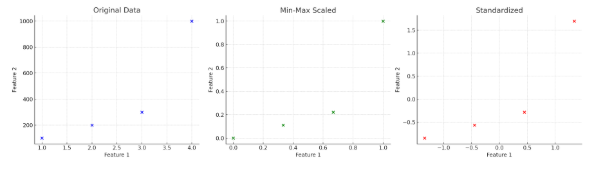


 ⛔ WARNING
 As with all the transformations, it is important to fit the scalers to the training data only,
 not to the full dataset (including the test set). Only then can you use them to transform the
 training set and the test set (and new data)

### Transformation Pipelines


Managing data preprocessing steps in the correct sequence is crucial for building effective machine learning models. Thankfully, Scikit-Learn simplifies this process through its Pipeline class, which allows you to chain together multiple transformation steps in a clean and organized manner. Below is an example of a simple pipeline designed specifically for handling numerical attributes:

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

The Pipeline constructor in Scikit-Learn allows you to define a clear and structured sequence of processing steps. It takes a list of (name, estimator) pairs, where each name is a unique identifier for the step, and the estimator is typically a transformer (except for the final step, which can be a predictor).

Each step in the pipeline — except the last one — must implement the fit_transform() method. When you call the pipeline’s fit() method, it executes fit_transform() on each transformer in order, passing the transformed output from one step as the input to the next. When it reaches the final estimator, it simply calls its fit() method.

The pipeline itself behaves like the final step in the chain: if your last estimator is a transformer (such as StandardScaler), the pipeline will expose a transform() and fit_transform() method. If it’s a predictor (like LinearRegression), it will instead expose predict() and score() methods.

So far, we’ve treated numerical and categorical features separately. But wouldn’t it be better to build one unified transformer that handles all columns — each with its appropriate transformation? That’s exactly what ColumnTransformer is for. Introduced in Scikit-Learn v0.20, it integrates beautifully with pandas DataFrames and allows you to specify different preprocessing pipelines for different columns. Let’s see how to use it to prepare the housing dataset:



In [80]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

First, we import the ColumnTransformer class. Then, we identify the lists of numerical and categorical column names. Next, we create a ColumnTransformer, which needs a list of tuples. Each tuple contains a name, a transformer, and the columns (or their indices) to apply that transformer to.

In this example:

The numerical columns are transformed using the num_pipeline we created earlier.

The categorical columns are transformed using a OneHotEncoder.

When we apply this ColumnTransformer to the housing data, it applies the transformations to the respective columns and combines the results.



And that's it! We've built a preprocessing pipeline that correctly applies transformations to the housing data.


<a id="train"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>1.4 |</span> Select and Train the Model</b></p>
</div>


You've now laid a strong foundation for your machine learning workflow. Here's a summary of where you're at:

- Framing the Problem: You've defined the problem and set clear objectives.

- Data Collection and Exploration: You've gathered and explored the data to understand its structure and identify key features.

- Sampling the Data: You've split the data into training and test sets to evaluate your model's performance.

- Data Preprocessing Pipelines: You've written transformation pipelines to clean and prepare the data, automating the process for future use.

Now, with all that preparation in place, it's time to move forward with selecting a machine learning model. The next step will be:

Model Selection: Choose a suitable algorithm (e.g., linear regression, decision tree, random forest, etc.).

Training the Model: Use the training set to teach the model to make predictions.

Evaluation: Evaluate the model's performance using the test set, and fine-tune it if needed.

You're all set to dive into model training and evaluation!

**The good news** is that thanks to all these previous steps, things are now going to be much simpler than you might think. Let’s first train a Linear Regression model

In [82]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

 Done! You now have a working Linear Regression model. Let’s try it out on a
 few instances from the training set

In [83]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [109640.86438464 135919.32879943  84971.15430365 158248.92146286
  48215.76260874]


In [84]:
print("Labels:", list(some_labels))

Labels: [72900.0, 97200.0, 67500.0, 87700.0, 79800.0]


It works, although the predictions are not exactly accurate (e.g., the first
 prediction is off by close to 40%!). Let’s measure this regression model’s
 RMSE on the whole training set using Scikit-Learn’s
mean_squared_error()
 function:


In [85]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68776.08138454506)

Right now, the model gives some results, but they’re not very accurate.
For example, one of the predictions is off by about 40%, which is a big error.
When we calculate the Root Mean Squared Error (RMSE) on the training data, it comes out to $68,628, wish is not great especially most median_housing_values are between $120,000 and $265,000.

This situation is a clear example of underfitting.
It means that the model is too simple to understand the patterns in the data properly.
There could be two main reasons for this:

The model doesn't have enough useful features (data inputs).

The model itself is not powerful enough.

Regularization (which adds restrictions to the model) isn't being used here, so that's not the cause.
You could try adding more features, like the logarithm of the population,
but first let's try using a more complex model to see if it performs better.


###  Underfitting vs Good Fit vs Overfitting

In supervised learning, it's important to strike the right balance between underfitting and overfitting. Here's a comparison:

| Feature                     | Underfitting                          | Good Fit                          | Overfitting                             |
|----------------------------|---------------------------------------|-----------------------------------|-----------------------------------------|
| **Model Complexity**        | Too simple                            | Balanced                          | Too complex                              |
| **Training Error**          | High                                  | Low                               | Very low                                 |
| **Test Error**              | High                                  | Low                               | High                                     |
| **Performance on New Data** | Poor                                  | Generalizes well                  | Poor                                     |
| **Cause**                   | Not enough features or weak model     | Right features & model complexity | Too many features or overly flexible     |
| **Solution**                | Use a more powerful model or add features | Maintain current setup         | Simplify the model or use regularization |

---

###  Explanation

- **Underfitting** happens when your model is too basic to learn from the training data. It misses important patterns and performs badly on both training and test sets.
- **Overfitting** occurs when your model is too complex and starts memorizing the training data, including the noise. It performs very well on training data but fails on unseen data.
- **Good Fit** is the sweet spot where the model captures the underlying patterns well and performs effectively on both seen and unseen data.

>  Goal: Build a model that **generalizes well** — not too simple, not too complex.


Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships in the data

In [87]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

 Now that the model is trained, let’s evaluate it on the training set:


In [88]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

### 🤔 Wait, What!? No Error at All?

If your model returns **zero error**, it might seem like it's perfect... but be careful!

> **Reality check**: It's *very* likely that the model has **severely overfit** the training data.

---

### So, How Can You Be Sure?

As discussed earlier, you should **not use the test set** until you're ready to evaluate your final model. Touching it too early can lead to misleading performance metrics.

Instead, here's what to do:

-  **Split the training data** into:
  - A **training set** (to train the model)
  - A **validation set** (to tune hyperparameters and evaluate performance)
  
This helps detect **overfitting** before it's too late and ensures that your final model generalizes well to new, unseen data.

 Always validate before testing — the test set should only be used once you're confident in your model's performance.


**Let’s train a
DecisionTreeRegressor**
 . This is a powerful model, capable of
 finding complex nonlinear relationships in the data

In [ ]:
# Instructions:
# Train a Decision Tree Regressor on the prepared housing data.
# This model will learn to predict house values based on the features.

# Step 1: Import the DecisionTreeRegressor from sklearn.tree
from sklearn.tree import _____________________________

# Step 2: Create an instance of the regressor
# Hint: Use random_state=42 to make results reproducible
tree_reg = _____________________________(random_state=____)

# Step 3: Fit the model to your training data (features and labels)
# Hint: housing_prepared contains the transformed feature data
#       housing_labels contains the corresponding target values

tree_reg.________(______________________, ________________________)


In [89]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Instructions:
# Make predictions using your trained Decision Tree model and evaluate its performance
# using Root Mean Squared Error (RMSE), a common regression metric.

# Step 1: Use the trained model to make predictions on the training data
housing_predictions = ____________.________(______________________)

# Step 2: Calculate the Mean Squared Error between actual and predicted values
from sklearn.metrics import ______________________
tree_mse = ______________________(_____________________, ______________________)

# Step 3: Compute the Root Mean Squared Error (RMSE) from the MSE
import numpy as np
tree_rmse = np._______(___________)

# Step 4: Display the RMSE result
___________


In [90]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

<a id="eval"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>1.5 |</span> Evaluating the Model</b></p>
</div>

### Better Evaluation Using Cross-Validation

One way to evaluate a model (like a Decision Tree) is to use the `train_test_split()` function:

- Split the **training set** into:
  - A **smaller training set**
  - A **validation set**
- Train your model on the smaller training set
- Evaluate it on the validation set

This approach works reasonably well, but there's an even better alternative...

---

###  K-Fold Cross-Validation (Recommended)

Scikit-Learn’s `cross_val_score()` uses **K-Fold Cross-Validation** to give a more reliable performance estimate.

 **How it works**:
- The data is split into **K subsets** (commonly K=10), called *folds*.
- The model is trained **K times**, each time using:
  - **K–1 folds for training**
  - **1 fold for validation**
- Each fold is used as the validation set once.

 This gives **K evaluation scores**, offering a better view of how the model performs on different subsets of data.

---




In [ ]:
# Instructions:
# Use cross-validation to evaluate the Decision Tree model more reliably.
# We'll use 10-fold cross-validation and the negative MSE scoring function (required by scikit-learn).

# Step 1: Import the cross_val_score function from sklearn
from sklearn.model_selection import ________________________

# Step 2: Perform 10-fold cross-validation on the model
# Hint: Use scoring="neg_mean_squared_error" because sklearn expects a score to maximize
scores = ________________________(___________, ______________________, ______________________,
                                  scoring="__________________________", cv=___)

# Step 3: Convert the negative MSE scores to positive RMSE scores
import numpy as np
tree_rmse_scores = np.________(-________)

# At this point, `tree_rmse_scores` contains 10 RMSE values, one for each fold


In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [92]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [69539.22781759 70572.51010651 70461.564166   68227.27956646
 71650.3954481  71698.32734162 72383.08117303 72105.54076103
 73316.55729389 73373.61121095]
Mean: 71332.8094885181
Standard deviation: 1556.7000439549806


 Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems
 to perform worse than the Linear Regression model! Notice that cross
validation allows you to get not only an estimate of the performance of your
 model, but also a measure of how precise this estimate is (i.e., its standard
 deviation). The Decision Tree has a score of approximately 71,407, generally
 ±2,439. You would not have this information if you just used one validation
 set. But cross-validation comes at the cost of training the model several times,
 so it is not always possible

In [93]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70599.36164221 65357.97220165 66399.69203432 68592.06312716
 66000.3028527  72059.83457768 66025.48181462 71718.52726065
 74576.15151308 70201.45222248]
Mean: 69153.0839246548
Standard deviation: 2994.192110324656


###  Overfitting with Decision Tree

As we can see, the **Decision Tree model** is **overfitting** so badly that it actually performs **worse** than the **Linear Regression model**.

> **Overfitting** means the model has learned the training data too well, including noise and outliers, which hurts its performance on new, unseen data.

---

###  Trying a Better Model: Random Forest

Let's move on to the next model: the **RandomForestRegressor**.

> **Random Forest** builds many **Decision Trees** on **random subsets of the data** and **averages** their predictions. This is an example of **Ensemble Learning**, a technique that combines multiple models to improve performance.

---

### Why Random Forests?

- They can **reduce overfitting** by averaging the predictions of multiple trees.
- The model is generally more **robust** to outliers and noise.

---

In [ ]:
# Instructions:
# Train a Random Forest Regressor model on the housing data.
# This model is an ensemble of decision trees that can improve predictive performance.

# Step 1: Import the RandomForestRegressor from sklearn.ensemble
from sklearn.ensemble import _____________________________

# Step 2: Create an instance of the regressor
# Hint: Set n_estimators=100 to specify the number of trees in the forest
forest_reg = _____________________________(n_estimators=_____, random_state=____)

# Step 3: Fit the model to your prepared housing data and corresponding labels
forest_reg.________(______________________, ________________________)


In [94]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [ ]:
# Instructions:
# Make predictions using the trained Random Forest model and evaluate its performance
# using Root Mean Squared Error (RMSE), which is a common metric for regression tasks.

# Step 1: Use the trained model to make predictions on the housing data
housing_predictions = ____________.________(______________________)

# Step 2: Calculate the Mean Squared Error between the true and predicted values
from sklearn.metrics import ______________________
forest_mse = ______________________(_____________________, ______________________)

# Step 3: Compute the Root Mean Squared Error (RMSE) from the MSE
import numpy as np
forest_rmse = np._______(___________)

# Step 4: Display the RMSE result
___________


In [96]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18706.71329742765)

In [ ]:
# Instructions:
# Use cross-validation to evaluate the Random Forest model and calculate RMSE scores.

# Step 1: Import the cross_val_score function from sklearn.model_selection
from sklearn.model_selection import ________________________

# Step 2: Perform 10-fold cross-validation on the Random Forest model
# Hint: Use scoring="neg_mean_squared_error" because sklearn expects scores to maximize
forest_scores = ________________________(___________, ______________________, ______________________,
                                        scoring="__________________________", cv=___)

# Step 3: Convert the negative MSE scores to positive RMSE scores
import numpy as np
forest_rmse_scores = np.________(-________)

# Step 4: Display the RMSE scores for all 10 folds
___________._________(forest_rmse_scores)


In [97]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52574.78245255 48214.1851777  48185.77755796 49031.77601464
 50108.47075773 52774.65548924 50225.11007543 48934.22216563
 50940.73055615 51834.04144749]
Mean: 50282.375169453655
Standard deviation: 1624.6802943116743


###  Random Forests: Promising, but Overfitting

The **Random Forest model** looks very promising, but we still see that the **training set score** is **much lower** than the **validation set score**. This indicates that the model is still **overfitting** the training data.

> **Overfitting** means the model is learning patterns that don't generalize well to new, unseen data.

---

###  Possible Solutions to Overfitting:

1. **Simplify the Model**: You can reduce the complexity of the model, for example by limiting the depth of the trees in the Random Forest.
2. **Regularization**: Apply regularization techniques to reduce overfitting (e.g., L1 or L2 regularization).
3. **Get More Training Data**: More data can help the model generalize better and avoid memorizing the training data.

---

###  Next Steps: Exploring More Models

Before diving too deep into fine-tuning the Random Forest model, it's a good idea to try out **other machine learning models** from various categories, such as:

- **Support Vector Machines (SVM)** with different kernels (linear, polynomial, radial basis function, etc.)
- **Neural Networks** (using a deep learning approach)

The goal here is not to spend too much time on hyperparameter tuning but to **shortlist a few promising models** (ideally 2 to 5) that could work well for your dataset.

---

###  Why Try Different Models?

- **Each model type** has its strengths and weaknesses.
- Testing a range of models will help you find the best one suited to your data.
- This also prevents relying on a single model type, which may have limitations.

---

By trying a variety of models, you will be in a much stronger position to choose the most suitable one for your problem!

##  TIP
 You should save every model you experiment with so that you can come back easily to
 any model you want. Make sure you save both the hyperparameters and the trained
 parameters, as well as the cross-validation scores and perhaps the actual predictions as
 well. This will allow you to easily compare scores across model types, and compare the
 types of errors they make. You can easily save Scikit-Learn models by using Python’s
 pickle
 module or by using the
joblib
 library, which is more efficient at serializing
 large NumPy arrays (you can install this library using pip):[
  
 import  joblib
joblib.dump(my_model, "my_model.pkl")
 and later...
my_model_loaded = joblib.load("my_model.pkl")]

<a id="tune"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>1.6 |</span> Fine-Tune Your Model</b></p>
</div>

### Grid Search

Let’s assume that you now have a shortlist of promising models. You now
 need to fine-tune them. Let’s look at a few ways you can do that.
Grid Search
 One option would be to fiddle with the hyperparameters manually, until you
 find a great combination of hyperparameter values. This would be very
 tedious work, and you may not have time to explore many combinations.
 Instead, you should get Scikit-Learn’s
GridSearchCV
 to search for you. All
 you need to do is tell it which hyperparameters you want it to experiment with
 and what values to try out, and it will use cross-validation to evaluate all the
 possible combinations of hyperparameter values. For example, the following
 code searches for the best combination of hyperparameter values for the
 RandomForestRegressor


In [ ]:
from sklearn.model_selection import GridSearchCV

# define the grid of parameters to try
params_grid=[
    # try 12 (3*4) combimbinaisons of hyperparameters
    {'n_estimators':[3,10,30],'max_features'[2,4,6,8]},
    # try a 6 (3*6) combination
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
    
]

# create an instance ofthe random forest
forest_reg= RandomForestRegressor(random_state=42)
#train the model accross 5 folds  (12+6)*5=90 rounds of training
grid_search= GridSearchCV(forest_reg,params_grid,cv=5,scording='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)


In [ ]:
#  access the parameters using best_params_
grid_search.best_params_ 

In [ ]:
# pour chaque combinaison _ score  by using cv_results
cvres=grid_search.cv_results
for mean_score , params in zip(cvres['mean_test_score], cvres["params"]):
    print(np.sqrt(-mean_score),params)

In [1]:
 from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,
4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

NameError: name 'RandomForestRegressor' is not defined

 # Evaluate Your System on the Test Set
 After tweaking your models for a while, you eventually have a system that
 performs sufficiently well. Now is the time to evaluate the final model on the
 test set. There is nothing special about this process; just get the predictors and
 the labels from your test set, run your
full_pipeline
 to transform the data
 (call
transform()
 , not
fit_transform()
 —you do not want to fit the test
 set!), and evaluate the final model on the test set:

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

## Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={
    "n_estimators':randint(low=1,high=200),
    "max_features":randint(low=1,high=8),
}
forest_reg= RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(forest_reg,params_distributions=param_distribs,
                              n_iter=10,cv=5, scoring:"neg+mean_squared_error',random_state=42)
rnd_search.fit(housing_prepared,housing_labels)

In [ ]:
# pour chaque combinaison _ score  by using cv_results
cvres=rnd_search.cv_results
for mean_score , params in zip(cvres['mean_test_score], cvres["params"]):
    print(np.sqrt(-mean_score),params)

## Evaluate the model on the test dataset


In [ ]:
final_model-grid_search.best_estimator_
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"],copy()
X_test_prepared= full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse  

<a id="concl"></a>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><span style='color:#e61227'>1.7 |</span> Conclusion</b></p>
</div>
